# Setup

## Libraries

Requires Python 3.10 and Poetry 1.6. Run setup commands to begin:
```
!poetry install
!poetry run jupyter lab
```

In [1]:
import os
import copy
import itertools
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

## Load data

In [2]:
raw_data = {
    "A": {
        "test_est": pd.read_parquet(os.path.join("data", "A", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join("data", "A", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join("data", "A", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join("data", "A", "train_targets.parquet")),
    },
    "B": {
        "test_est": pd.read_parquet(os.path.join("data", "B", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join("data", "B", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join("data", "B", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join("data", "B", "train_targets.parquet")),
    },
    "C": {
        "test_est": pd.read_parquet(os.path.join("data", "C", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join("data", "C", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join("data", "C", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join("data", "C", "train_targets.parquet")),
    },
}

In [3]:
raw_data["C"]["test_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0


In [4]:
raw_data["C"]["train_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.000000,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.000000,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.000000,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.000000,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.000000,6865.000000,1.2,0.1,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769000,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923000,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967000,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,0.0,0.0,0.0,0.0,99.000000,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,998.299988,1004.500000,0.0,0.0,79.800003,1010.799988,NaN,0.0,0.0,-0.0,0.1,4.067000,-11.902000,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0


In [5]:
raw_data["C"]["train_obs"]

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,2022-05-01 21:00:00,4.9,1.257,2652.000000,0.0,0.0,1536.500000,0.0,273.600006,0.0,0.0,0.0,0.0,95.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,999.299988,1005.400024,0.0,0.0,62.599998,1011.599976,NaN,0.0,0.0,-0.0,0.0,327.303009,-7.367000,0.0,279.299988,100.000000,38312.000000,4.7,3.0,3.6,-0.0
116821,2022-05-01 21:15:00,4.9,1.256,2375.300049,0.0,0.0,1484.500000,0.0,273.600006,0.0,0.0,0.0,0.0,97.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,999.000000,1005.099976,0.0,0.0,62.799999,1011.299988,NaN,0.0,0.0,-0.0,0.0,330.863007,-8.232000,0.1,279.299988,100.000000,38344.199219,4.8,3.2,3.6,-0.0
116822,2022-05-01 21:30:00,4.9,1.256,2098.699951,0.0,0.0,1432.500000,0.0,273.500000,0.0,0.0,0.0,0.0,98.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.00,0.0,998.599976,1004.799988,0.0,0.0,63.000000,1010.900024,NaN,0.0,0.0,-0.0,0.0,334.451996,-9.006000,0.1,279.200012,100.000000,38402.601562,4.9,3.3,3.6,-0.0
116823,2022-05-01 21:45:00,4.8,1.255,1822.000000,0.0,0.0,1380.400024,0.0,273.399994,0.0,0.0,0.0,0.0,99.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.00,0.0,998.299988,1004.400024,0.0,0.0,63.200001,1010.599976,NaN,0.0,0.0,-0.0,0.0,338.067993,-9.683000,0.1,279.200012,100.000000,38478.800781,5.0,3.5,3.6,-0.0


In [6]:
raw_data["C"]["train_tar"]

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


In [7]:
for i, loc in enumerate(["A", "B", "C"],1):
    nans = raw_data[loc]["test_est"].set_index("date_forecast").isna()
    print(nans.sum()[nans.sum() != 0])
    #nans.sum(axis=1).plot(lw=0.5)
    #plt.show()

ceiling_height_agl:m     793
cloud_base_agl:m         298
snow_density:kgm3       2880
dtype: int64
ceiling_height_agl:m     755
cloud_base_agl:m         277
snow_density:kgm3       2880
dtype: int64
ceiling_height_agl:m     849
cloud_base_agl:m         375
snow_density:kgm3       2880
dtype: int64


In [8]:
for loc in ["A", "B", "C"]:
    nans = raw_data[loc]["train_est"].set_index("date_forecast").isna()
    print(nans.sum()[nans.sum() != 0])
    #nans.sum(axis=1).plot(lw=0.3)
    #plt.show()

ceiling_height_agl:m     3919
cloud_base_agl:m         2094
snow_density:kgm3       15769
dtype: int64
ceiling_height_agl:m     3689
cloud_base_agl:m         1963
snow_density:kgm3       15713
dtype: int64
ceiling_height_agl:m     4596
cloud_base_agl:m         2804
snow_density:kgm3       13898
dtype: int64


In [9]:
for loc in ["A", "B", "C"]:
    nans = raw_data[loc]["train_obs"].set_index("date_forecast").isna()
    print(nans.sum()[nans.sum() != 0])
    #nans.sum(axis=1).plot(lw=0.1)
    #plt.show()

ceiling_height_agl:m     22247
cloud_base_agl:m          8066
snow_density:kgm3       115945
dtype: int64
ceiling_height_agl:m     18772
cloud_base_agl:m          7473
snow_density:kgm3       111201
dtype: int64
ceiling_height_agl:m     19923
cloud_base_agl:m          8512
snow_density:kgm3       107593
dtype: int64


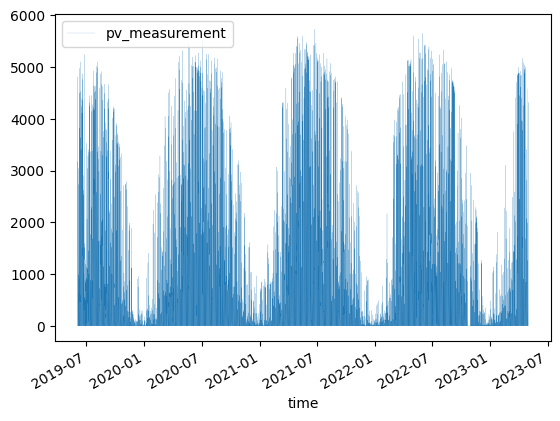

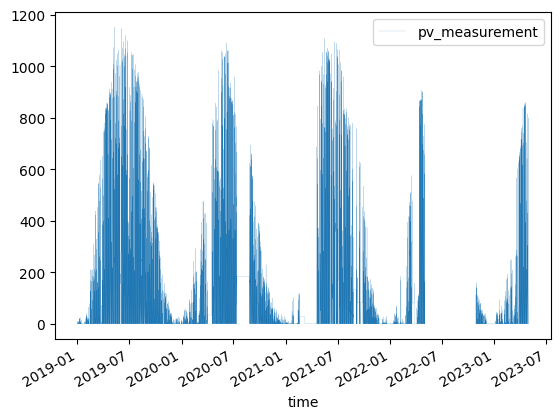

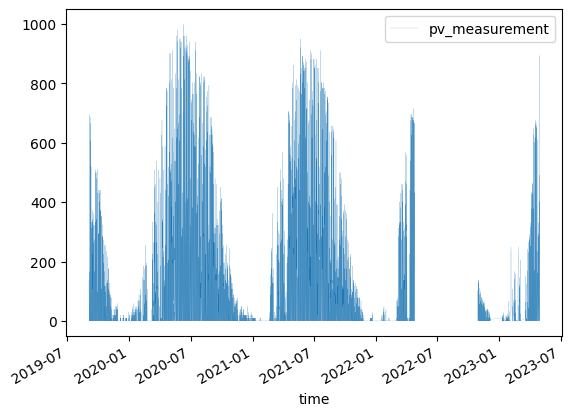

In [10]:
for loc in ["A", "B", "C"]:
    raw_data[loc]["train_tar"].set_index("time").plot(lw=0.1)
    plt.show()

## Data preprocessing

Basic data preprocessing

In [11]:
# Create empty list of location train data and location test data
train_data = {}
test_data = {}

# Copy raw data dictonary and loop through it
raw_data_copy = copy.deepcopy(raw_data)
for k in raw_data_copy:
    # Add a column with the difference between date_forecast and date_calc in seconds and 
    raw_data_copy[k]["train_obs"]["forecast_seconds"] = 0
    raw_data_copy[k]["train_est"]["forecast_seconds"] = (raw_data_copy[k]["train_est"]["date_forecast"] - raw_data_copy[k]["train_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    raw_data_copy[k]["test_est"]["forecast_seconds"] = (raw_data_copy[k]["test_est"]["date_forecast"] - raw_data_copy[k]["test_est"]["date_calc"]).apply(lambda x: x.total_seconds())

    # Remove date_calc
    del raw_data_copy[k]["train_est"]["date_calc"]
    del raw_data_copy[k]["test_est"]["date_calc"]

    # Concat and merge train observed, train estimated and train target to one dataframe
    location_train_data = pd.merge(
        raw_data_copy[k]["train_tar"],
        pd.concat([raw_data_copy[k]["train_obs"], raw_data_copy[k]["train_est"]]).rename(columns={"date_forecast": "time"}),
        on="time",
        how="outer"
    ).set_index("time").sort_index()
    location_test_data = raw_data_copy[k]["test_est"].rename(columns={"date_forecast": "time"}).set_index("time").sort_index()

    # Replace all ':' with '_'
    location_train_data.columns = [col_name.replace(":", "_") for col_name in location_train_data.columns]
    location_test_data.columns = [col_name.replace(":", "_") for col_name in location_test_data.columns]

    # Remove columns only containing a single or non values
    del location_train_data['snow_density_kgm3']
    del location_test_data['snow_density_kgm3']
    
    # Add to dictonary
    train_data[k] = location_train_data
    test_data[k] = location_test_data

Gap detection

In [12]:
gaps = {}
min_gap_interval = pd.Timedelta(days=10) 

for loc in ["A", "B", "C"]:
    gaps[loc] = {}
    loc_data = train_data[loc]
    
    gaps_start_dates = []
    gaps_end_dates = []
    
    start_date = loc_data.index[0]
    start_val = loc_data["pv_measurement"][0]
    
    for date in loc_data.index:
        val = loc_data["pv_measurement"][date]
        
        if(val != start_val and not math.isnan(val)):
            if(date - start_date > min_gap_interval):
                gaps_start_dates.append(start_date)
                gaps_end_dates.append(date)
    
            start_date = date
            start_val = val
    
    gaps[loc]["start_dates"] = gaps_start_dates
    gaps[loc]["end_dates"] = gaps_end_dates

gaps

{'A': {'start_dates': [], 'end_dates': []},
 'B': {'start_dates': [Timestamp('2020-04-02 01:00:00'),
   Timestamp('2020-07-12 20:00:00'),
   Timestamp('2021-02-17 23:00:00'),
   Timestamp('2021-03-08 15:00:00'),
   Timestamp('2022-05-02 16:00:00'),
   Timestamp('2022-12-06 12:00:00')],
  'end_dates': [Timestamp('2020-04-16 07:00:00'),
   Timestamp('2020-08-25 22:00:00'),
   Timestamp('2021-03-08 15:00:00'),
   Timestamp('2021-04-19 12:00:00'),
   Timestamp('2022-10-29 07:00:00'),
   Timestamp('2022-12-27 10:00:00')]},
 'C': {'start_dates': [Timestamp('2018-12-31 23:00:00'),
   Timestamp('2020-02-23 16:00:00'),
   Timestamp('2021-01-09 13:00:00'),
   Timestamp('2021-01-24 12:00:00'),
   Timestamp('2021-11-24 13:00:00'),
   Timestamp('2021-12-21 13:00:00'),
   Timestamp('2022-02-08 13:00:00'),
   Timestamp('2022-04-25 19:00:00'),
   Timestamp('2022-12-05 13:00:00'),
   Timestamp('2023-03-05 11:00:00')],
  'end_dates': [Timestamp('2019-09-04 08:00:00'),
   Timestamp('2020-03-08 09:00:00')

Reindex and interpolate missing values based on time

In [13]:
def reindex_interpolate(data, freq):
    data_15T = {}
    
    for loc in ["A", "B", "C"]:
        start = data[loc]["pv_measurement"].first_valid_index()
        end = data[loc]["pv_measurement"].last_valid_index()
        data_15T[loc] = data[loc].reindex(pd.date_range(start=start, end=end, freq=freq)).interpolate(method='time').dropna()

    return data_15T

In [14]:
train_data_15T = reindex_interpolate(train_data, freq="15T")
test_data_15T = reindex_interpolate(train_data, freq="15T")
train_data_H = reindex_interpolate(train_data, freq="H")
test_data_H = reindex_interpolate(train_data, freq="H")

## View data

In [15]:
pd.concat(train_data_15T)

pv_measurement  absolute_humidity_2m_gm3  \
A 2019-06-02 22:00:00             0.0                       7.7   
  2019-06-02 22:15:00             0.0                       7.7   
  2019-06-02 22:30:00             0.0                       7.7   
  2019-06-02 22:45:00             0.0                       7.7   
  2019-06-02 23:00:00             0.0                       7.7   
...                               ...                       ...   
C 2023-04-30 22:00:00            -0.0                       4.4   
  2023-04-30 22:15:00             0.0                       4.4   
  2023-04-30 22:30:00             0.0                       4.4   
  2023-04-30 22:45:00             0.0                       4.4   
  2023-04-30 23:00:00            -0.0                       4.4   

                       air_density_2m_kgm3  ceiling_height_agl_m  \
A 2019-06-02 22:00:00                1.230           1744.900024   
  2019-06-02 22:15:00                1.229           1734.000000   
  2019-06-02 22:30:00                1.228           1723.500000   
  2019-06-02 22:45:00                1.226           1713.400024   
  2019-06-02 23:00:00                1.225           1703.599976   
...                                    ...                   ...   
C 2023-04-30 22:00:00                1.279           1446.599976   
  2023-04-30 22:15:00                1.280           1309.300049   
  2023-04-30 22:30:00                1.280           1171.900024   
  2023-04-30 22:45:00                1.280           1034.599976   
  2023-04-30 23:00:00                1.280            897.200012   

                       clear_sky_energy_1h_J  clear_sky_rad_W  \
A 2019-06-02 22:00:00                    0.0              0.0   
  2019-06-02 22:15:00                    0.0              0.0   
  2019-06-02 22:30:00                    0.0              0.0   
  2019-06-02 22:45:00                    0.0              0.0   
  2019-06-02 23:00:00                    0.0              0.0   
...                                      ...              ...   
C 2023-04-30 22:00:00                    0.0              0.0   
  2023-04-30 22:15:00                    0.0              0.0   
  2023-04-30 22:30:00                    0.0              0.0   
  2023-04-30 22:45:00                    0.0              0.0   
  2023-04-30 23:00:00                    0.0              0.0   

                       cloud_base_agl_m  dew_or_rime_idx  dew_point_2m_K  \
A 2019-06-02 22:00:00       1744.900024              0.0      280.299988   
  2019-06-02 22:15:00       1734.000000              0.0      280.299988   
  2019-06-02 22:30:00       1723.500000              0.0      280.299988   
  2019-06-02 22:45:00       1713.400024              0.0      280.299988   
  2019-06-02 23:00:00       1703.599976              0.0      280.299988   
...                                 ...              ...             ...   
C 2023-04-30 22:00:00        540.700012              0.0      271.899994   
  2023-04-30 22:15:00        547.900024              0.0      271.899994   
  2023-04-30 22:30:00        555.099976              0.0      272.000000   
  2023-04-30 22:45:00        562.299988              0.0      272.000000   
  2023-04-30 23:00:00        569.500000              0.0      272.000000   

                       diffuse_rad_W  diffuse_rad_1h_J  direct_rad_W  \
A 2019-06-02 22:00:00            0.0               0.0           0.0   
  2019-06-02 22:15:00            0.0               0.0           0.0   
  2019-06-02 22:30:00            0.0               0.0           0.0   
  2019-06-02 22:45:00            0.0               0.0           0.0   
  2019-06-02 23:00:00            0.0               0.0           0.0   
...                              ...               ...           ...   
C 2023-04-30 22:00:00            0.0               0.0           0.0   
  2023-04-30 22:15:00            0.0               0.0           0.0   
  2023-04-30 22:30:00            0.0               0.0     

In [16]:
pd.concat(test_data_15T)

pv_measurement  absolute_humidity_2m_gm3  \
A 2019-06-02 22:00:00             0.0                       7.7   
  2019-06-02 22:15:00             0.0                       7.7   
  2019-06-02 22:30:00             0.0                       7.7   
  2019-06-02 22:45:00             0.0                       7.7   
  2019-06-02 23:00:00             0.0                       7.7   
...                               ...                       ...   
C 2023-04-30 22:00:00            -0.0                       4.4   
  2023-04-30 22:15:00             0.0                       4.4   
  2023-04-30 22:30:00             0.0                       4.4   
  2023-04-30 22:45:00             0.0                       4.4   
  2023-04-30 23:00:00            -0.0                       4.4   

                       air_density_2m_kgm3  ceiling_height_agl_m  \
A 2019-06-02 22:00:00                1.230           1744.900024   
  2019-06-02 22:15:00                1.229           1734.000000   
  2019-06-02 22:30:00                1.228           1723.500000   
  2019-06-02 22:45:00                1.226           1713.400024   
  2019-06-02 23:00:00                1.225           1703.599976   
...                                    ...                   ...   
C 2023-04-30 22:00:00                1.279           1446.599976   
  2023-04-30 22:15:00                1.280           1309.300049   
  2023-04-30 22:30:00                1.280           1171.900024   
  2023-04-30 22:45:00                1.280           1034.599976   
  2023-04-30 23:00:00                1.280            897.200012   

                       clear_sky_energy_1h_J  clear_sky_rad_W  \
A 2019-06-02 22:00:00                    0.0              0.0   
  2019-06-02 22:15:00                    0.0              0.0   
  2019-06-02 22:30:00                    0.0              0.0   
  2019-06-02 22:45:00                    0.0              0.0   
  2019-06-02 23:00:00                    0.0              0.0   
...                                      ...              ...   
C 2023-04-30 22:00:00                    0.0              0.0   
  2023-04-30 22:15:00                    0.0              0.0   
  2023-04-30 22:30:00                    0.0              0.0   
  2023-04-30 22:45:00                    0.0              0.0   
  2023-04-30 23:00:00                    0.0              0.0   

                       cloud_base_agl_m  dew_or_rime_idx  dew_point_2m_K  \
A 2019-06-02 22:00:00       1744.900024              0.0      280.299988   
  2019-06-02 22:15:00       1734.000000              0.0      280.299988   
  2019-06-02 22:30:00       1723.500000              0.0      280.299988   
  2019-06-02 22:45:00       1713.400024              0.0      280.299988   
  2019-06-02 23:00:00       1703.599976              0.0      280.299988   
...                                 ...              ...             ...   
C 2023-04-30 22:00:00        540.700012              0.0      271.899994   
  2023-04-30 22:15:00        547.900024              0.0      271.899994   
  2023-04-30 22:30:00        555.099976              0.0      272.000000   
  2023-04-30 22:45:00        562.299988              0.0      272.000000   
  2023-04-30 23:00:00        569.500000              0.0      272.000000   

                       diffuse_rad_W  diffuse_rad_1h_J  direct_rad_W  \
A 2019-06-02 22:00:00            0.0               0.0           0.0   
  2019-06-02 22:15:00            0.0               0.0           0.0   
  2019-06-02 22:30:00            0.0               0.0           0.0   
  2019-06-02 22:45:00            0.0               0.0           0.0   
  2019-06-02 23:00:00            0.0               0.0           0.0   
...                              ...               ...           ...   
C 2023-04-30 22:00:00            0.0               0.0           0.0   
  2023-04-30 22:15:00            0.0               0.0           0.0   
  2023-04-30 22:30:00            0.0               0.0     

In [17]:
pd.concat(train_data_15T).describe()

,pv_measurement,absolute_humidity_2m_gm3,air_density_2m_kgm3,ceiling_height_agl_m,clear_sky_energy_1h_J,clear_sky_rad_W,cloud_base_agl_m,dew_or_rime_idx,dew_point_2m_K,diffuse_rad_W,diffuse_rad_1h_J,direct_rad_W,direct_rad_1h_J,effective_cloud_cover_p,elevation_m,fresh_snow_12h_cm,fresh_snow_1h_cm,fresh_snow_24h_cm,fresh_snow_3h_cm,fresh_snow_6h_cm,is_day_idx,is_in_shadow_idx,msl_pressure_hPa,precip_5min_mm,precip_type_5min_idx,pressure_100m_hPa,pressure_50m_hPa,prob_rime_p,rain_water_kgm2,relative_humidity_1000hPa_p,sfc_pressure_hPa,snow_depth_cm,snow_drift_idx,snow_melt_10min_mm,snow_water_kgm2,sun_azimuth_d,sun_elevation_d,super_cooled_liquid_water_kgm2,t_1000hPa_K,total_cloud_cover_p,visibility_m,wind_speed_10m_ms,wind_speed_u_10m_ms,wind_speed_v_10m_ms,wind_speed_w_1000hPa_ms,forecast_seconds
count,416991.000000,416991.000000,416991.000000,416991.000000,4.169910e+05,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,4.169910e+05,416991.000000,4.169910e+05,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000
mean,256.465562,5.980849,1.256001,3133.130615,4.625945e+05,128.496811,1820.208496,0.045249,275.159210,35.513260,1.278488e+05,45.068001,1.622492e+05,68.934967,11.894667,0.125909,0.010455,0.248436,0.031430,0.062874,0.437033,0.607282,1009.293518,0.005133,0.077791,995.537659,1001.670044,0.733440,0.008544,74.357048,1007.833984,0.211938,0.000019,0.000295,0.098676,186.050537,-3.560757,0.055408,279.357422,74.943237,32789.500000,3.024261,0.746413,0.718536,-0.000007,18773.855349
std,721.567238,2.632502,0.035748,2660.815186,7.920169e+05,220.549408,1915.046631,0.287547,6.710734,58.865307,2.093219e+05,108.358597,3.847666e+05,33.797298,8.072765,0.808716,0.115054,1.271861,0.287922,0.494000,0.496020,0.488356,12.604171,0.031512,0.374729,12.545974,12.603570,5.324673,0.040032,13.935208,12.662017,1.265167,0.004380,0.004359,0.234457,105.494759,24.030226,0.104828,6.378902,33.370480,17353.457031,1.716083,2.718804,1.867701,0.006159,39748.520663
min,-0.000000,0.500000,1.139000,27.600000,0.000000e+00,0.000000,27.299999,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,19.500000,941.400024,0.000000,0.000000,-0.000000,0.000000,0.002000,-50.042000,0.000000,257.899994,0.000000,130.600006,0.000000,-7.300000,-9.300000,-0.100000,0.000000
25%,0.000000,4.100000,1.233000,1233.400024,0.000000e+00,0.000000,650.700012,0.000000,270.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,46.400002,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.900024,0.000000,0.000000,988.099976,994.200012,0.000000,0.000000,65.400002,1000.393494,0.000000,0.000000,0.000000,0.000000,93.755497,-22.065019,0.000000,275.000000,57.400002,18692.299805,1.700000,-1.200000,-0.600000,0.000000,0.000000
50%,0.000000,5.500000,1.254000,2069.399902,0.000000e+00,0.000000,1214.699951,0.000000,275.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,82.599998,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1009.900024,0.000000,0.000000,996.099976,1002.200012,0.000000,0.000000,76.900002,1008.400024,0.000000,0.000000,0.000000,0.000000,187.591003,-3.667000,0.000000,278.899994,94.199997,35905.371094,2.700000,0.500000,0.794841,0.000000,0.000000
75%,129.360000,7.700000,1.278000,4429.799805,6.159862e+05,171.199997,2113.100098,0.000000,280.200012,56.500000,2.019525e+05,18.100000,7.252975e+04,99.300003,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10

In [18]:
pd.concat(train_data_15T).isna().sum()

pv_measurement                    0
absolute_humidity_2m_gm3          0
air_density_2m_kgm3               0
ceiling_height_agl_m              0
clear_sky_energy_1h_J             0
clear_sky_rad_W                   0
cloud_base_agl_m                  0
dew_or_rime_idx                   0
dew_point_2m_K                    0
diffuse_rad_W                     0
diffuse_rad_1h_J                  0
direct_rad_W                      0
direct_rad_1h_J                   0
effective_cloud_cover_p           0
elevation_m                       0
fresh_snow_12h_cm                 0
fresh_snow_1h_cm                  0
fresh_snow_24h_cm                 0
fresh_snow_3h_cm                  0
fresh_snow_6h_cm                  0
is_day_idx                        0
is_in_shadow_idx                  0
msl_pressure_hPa                  0
precip_5min_mm                    0
precip_type_5min_idx              0
pressure_100m_hPa                 0
pressure_50m_hPa                  0
prob_rime_p                 

In [19]:
pd.concat(test_data_15T).describe()

,pv_measurement,absolute_humidity_2m_gm3,air_density_2m_kgm3,ceiling_height_agl_m,clear_sky_energy_1h_J,clear_sky_rad_W,cloud_base_agl_m,dew_or_rime_idx,dew_point_2m_K,diffuse_rad_W,diffuse_rad_1h_J,direct_rad_W,direct_rad_1h_J,effective_cloud_cover_p,elevation_m,fresh_snow_12h_cm,fresh_snow_1h_cm,fresh_snow_24h_cm,fresh_snow_3h_cm,fresh_snow_6h_cm,is_day_idx,is_in_shadow_idx,msl_pressure_hPa,precip_5min_mm,precip_type_5min_idx,pressure_100m_hPa,pressure_50m_hPa,prob_rime_p,rain_water_kgm2,relative_humidity_1000hPa_p,sfc_pressure_hPa,snow_depth_cm,snow_drift_idx,snow_melt_10min_mm,snow_water_kgm2,sun_azimuth_d,sun_elevation_d,super_cooled_liquid_water_kgm2,t_1000hPa_K,total_cloud_cover_p,visibility_m,wind_speed_10m_ms,wind_speed_u_10m_ms,wind_speed_v_10m_ms,wind_speed_w_1000hPa_ms,forecast_seconds
count,416991.000000,416991.000000,416991.000000,416991.000000,4.169910e+05,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,4.169910e+05,416991.000000,4.169910e+05,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000,416991.000000
mean,256.465562,5.980849,1.256001,3133.130615,4.625945e+05,128.496811,1820.208496,0.045249,275.159210,35.513260,1.278488e+05,45.068001,1.622492e+05,68.934967,11.894667,0.125909,0.010455,0.248436,0.031430,0.062874,0.437033,0.607282,1009.293518,0.005133,0.077791,995.537659,1001.670044,0.733440,0.008544,74.357048,1007.833984,0.211938,0.000019,0.000295,0.098676,186.050537,-3.560757,0.055408,279.357422,74.943237,32789.500000,3.024261,0.746413,0.718536,-0.000007,18773.855349
std,721.567238,2.632502,0.035748,2660.815186,7.920169e+05,220.549408,1915.046631,0.287547,6.710734,58.865307,2.093219e+05,108.358597,3.847666e+05,33.797298,8.072765,0.808716,0.115054,1.271861,0.287922,0.494000,0.496020,0.488356,12.604171,0.031512,0.374729,12.545974,12.603570,5.324673,0.040032,13.935208,12.662017,1.265167,0.004380,0.004359,0.234457,105.494759,24.030226,0.104828,6.378902,33.370480,17353.457031,1.716083,2.718804,1.867701,0.006159,39748.520663
min,-0.000000,0.500000,1.139000,27.600000,0.000000e+00,0.000000,27.299999,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,19.500000,941.400024,0.000000,0.000000,-0.000000,0.000000,0.002000,-50.042000,0.000000,257.899994,0.000000,130.600006,0.000000,-7.300000,-9.300000,-0.100000,0.000000
25%,0.000000,4.100000,1.233000,1233.400024,0.000000e+00,0.000000,650.700012,0.000000,270.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,46.400002,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.900024,0.000000,0.000000,988.099976,994.200012,0.000000,0.000000,65.400002,1000.393494,0.000000,0.000000,0.000000,0.000000,93.755497,-22.065019,0.000000,275.000000,57.400002,18692.299805,1.700000,-1.200000,-0.600000,0.000000,0.000000
50%,0.000000,5.500000,1.254000,2069.399902,0.000000e+00,0.000000,1214.699951,0.000000,275.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,82.599998,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1009.900024,0.000000,0.000000,996.099976,1002.200012,0.000000,0.000000,76.900002,1008.400024,0.000000,0.000000,0.000000,0.000000,187.591003,-3.667000,0.000000,278.899994,94.199997,35905.371094,2.700000,0.500000,0.794841,0.000000,0.000000
75%,129.360000,7.700000,1.278000,4429.799805,6.159862e+05,171.199997,2113.100098,0.000000,280.200012,56.500000,2.019525e+05,18.100000,7.252975e+04,99.300003,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10

In [20]:
pd.concat(test_data_15T).isna().sum()

pv_measurement                    0
absolute_humidity_2m_gm3          0
air_density_2m_kgm3               0
ceiling_height_agl_m              0
clear_sky_energy_1h_J             0
clear_sky_rad_W                   0
cloud_base_agl_m                  0
dew_or_rime_idx                   0
dew_point_2m_K                    0
diffuse_rad_W                     0
diffuse_rad_1h_J                  0
direct_rad_W                      0
direct_rad_1h_J                   0
effective_cloud_cover_p           0
elevation_m                       0
fresh_snow_12h_cm                 0
fresh_snow_1h_cm                  0
fresh_snow_24h_cm                 0
fresh_snow_3h_cm                  0
fresh_snow_6h_cm                  0
is_day_idx                        0
is_in_shadow_idx                  0
msl_pressure_hPa                  0
precip_5min_mm                    0
precip_type_5min_idx              0
pressure_100m_hPa                 0
pressure_50m_hPa                  0
prob_rime_p                 

## Visualize data

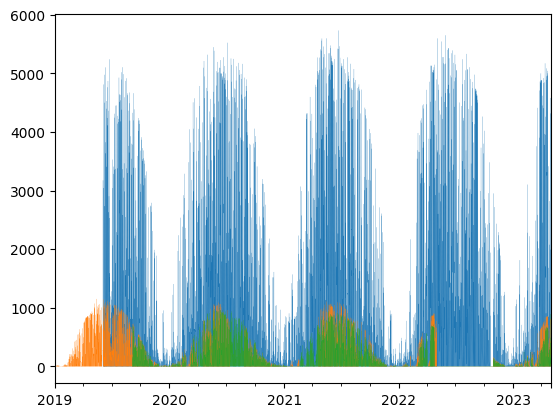

In [21]:
for loc in ["A", "B", "C"]:
    train_data_15T[loc]["pv_measurement"].plot(lw=0.1)
plt.show()

In [22]:
gaps["C"]

{'start_dates': [Timestamp('2018-12-31 23:00:00'),
  Timestamp('2020-02-23 16:00:00'),
  Timestamp('2021-01-09 13:00:00'),
  Timestamp('2021-01-24 12:00:00'),
  Timestamp('2021-11-24 13:00:00'),
  Timestamp('2021-12-21 13:00:00'),
  Timestamp('2022-02-08 13:00:00'),
  Timestamp('2022-04-25 19:00:00'),
  Timestamp('2022-12-05 13:00:00'),
  Timestamp('2023-03-05 11:00:00')],
 'end_dates': [Timestamp('2019-09-04 08:00:00'),
  Timestamp('2020-03-08 09:00:00'),
  Timestamp('2021-01-22 11:00:00'),
  Timestamp('2021-02-19 11:00:00'),
  Timestamp('2021-12-14 10:00:00'),
  Timestamp('2022-01-16 11:00:00'),
  Timestamp('2022-03-02 10:00:00'),
  Timestamp('2022-10-29 08:00:00'),
  Timestamp('2023-01-08 12:00:00'),
  Timestamp('2023-03-18 08:00:00')]}

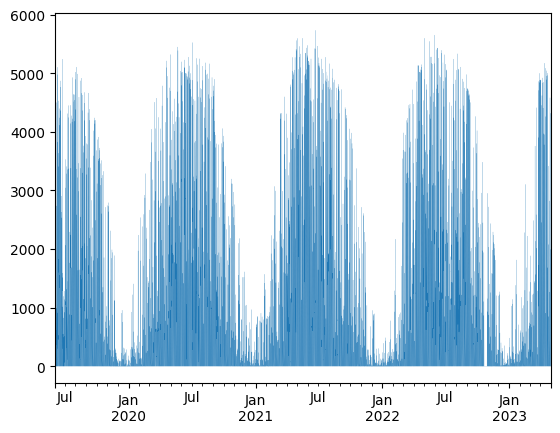

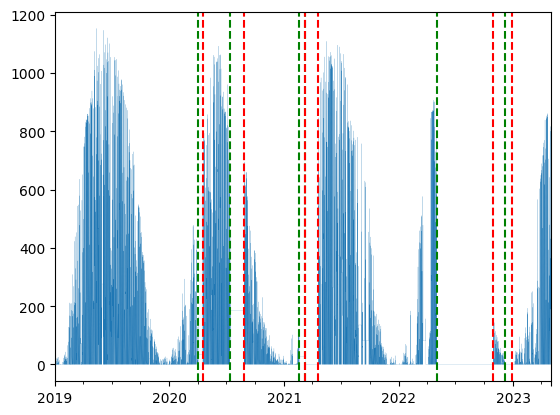

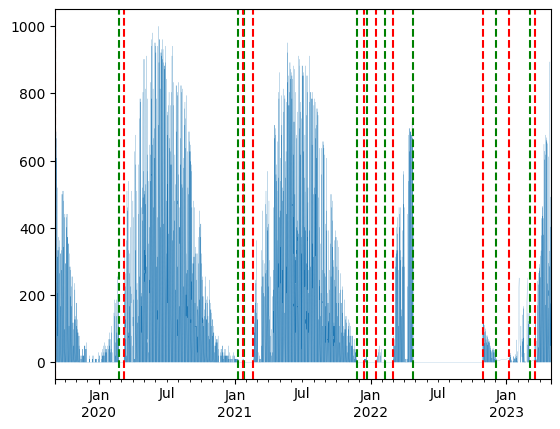

In [23]:
for loc in ["A", "B", "C"]:
    ax = train_data_15T[loc]["pv_measurement"].plot(lw=0.1)
    
    for date in gaps[loc]["start_dates"]:
        plt.axvline(date, linestyle='--', color="green")
        
    for date in gaps[loc]["end_dates"]:
        plt.axvline(date, linestyle='--', color="red")

    plt.show()

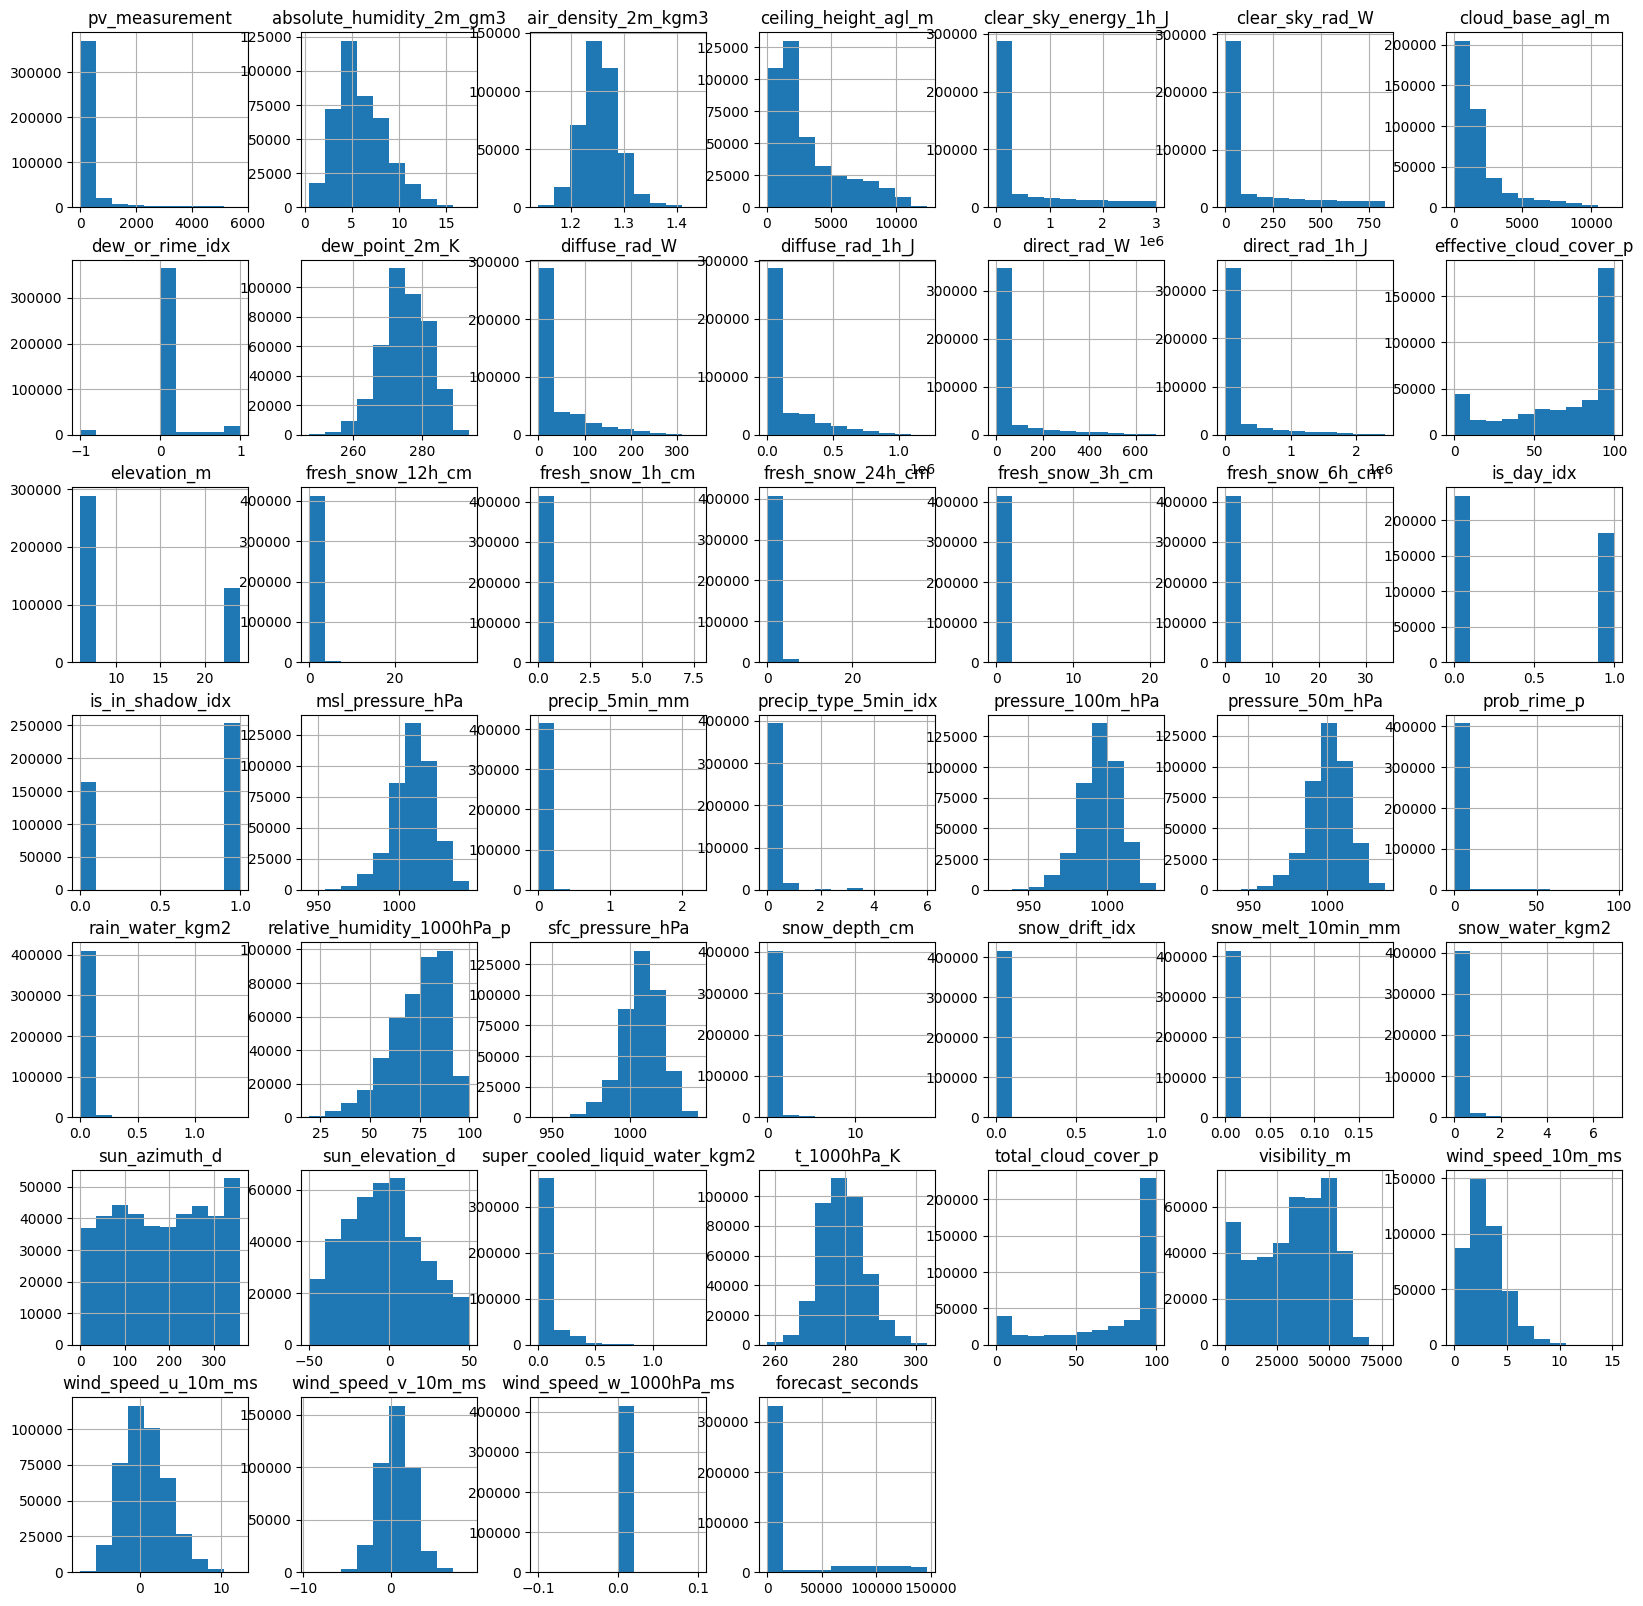

In [24]:
pd.concat(train_data_15T).hist(figsize=(20,20))
plt.show()

0. pv_measurement
1. absolute_humidity_2m_gm3
2. air_density_2m_kgm3
3. ceiling_height_agl_m
4. clear_sky_energy_1h_J
5. clear_sky_rad_W
6. cloud_base_agl_m
7. dew_or_rime_idx
8. dew_point_2m_K
9. diffuse_rad_W
10. diffuse_rad_1h_J
11. direct_rad_W
12. direct_rad_1h_J
13. effective_cloud_cover_p
14. elevation_m
15. fresh_snow_12h_cm
16. fresh_snow_1h_cm
17. fresh_snow_24h_cm
18. fresh_snow_3h_cm
19. fresh_snow_6h_cm
20. is_day_idx
21. is_in_shadow_idx
22. msl_pressure_hPa
23. precip_5min_mm
24. precip_type_5min_idx
25. pressure_100m_hPa
26. pressure_50m_hPa
27. prob_rime_p
28. rain_water_kgm2
29. relative_humidity_1000hPa_p
30. sfc_pressure_hPa
31. snow_depth_cm
32. snow_drift_idx
33. snow_melt_10min_mm
34. snow_water_kgm2
35. sun_azimuth_d
36. sun_elevation_d
37. super_cooled_liquid_water_kgm2
38. t_1000hPa_K
39. total_cloud_cover_p
40. visibility_m
41. wind_speed_10m_ms
42. wind_speed_u_10m_ms
43. wind_speed_v_10m_ms
44. wind_speed_w_1000hPa_ms
45. forecast_seconds


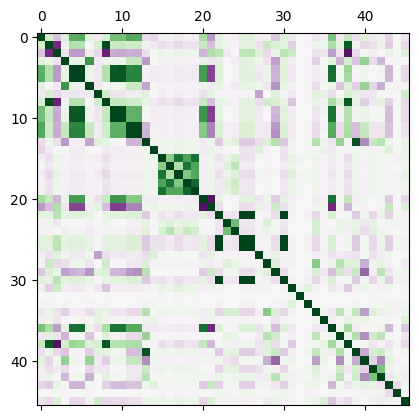

In [25]:
for i, column in enumerate(train_data_15T["A"].select_dtypes(include=['number']).columns):
    print(f"{i}. {column}")

plt.matshow(pd.concat(train_data_15T).corr(numeric_only=True), cmap="PRGn", interpolation="none", vmin=-1, vmax=1)
plt.show()

## More data preprocessing

One hot encoding of categorial values in data frame

In [26]:
def one_hot_encoding(data):
    return pd.get_dummies(data)

Z-score normalizing of numeric values in data frame

In [27]:
class StandardScaler:
    def __init__(self, data):
        self.means = data.mean(numeric_only=True)
        self.stds = data.std(numeric_only=True)

    def normalize(self, data):
        indices = self.indices(data)
        data_copy = data.copy()
        data_copy[indices] = (data[indices] - self.means[indices]) / self.stds[indices]
        return data_copy

    def denormalize(self, data):
        indices = self.indices(data)
        data_copy = data.copy()
        data_copy[indices] = data[indices] * self.stds[indices] + self.means[indices]
        return data_copy

    def indices(self, data):
        return list(set(self.means.index) & set(data.columns))

Polynomial expansion of numeric values in data frame to degree n
    
Example:
If [x y] = data then
    degree 1: [1 x y]
    degree 2: [1 x y xx xy yy]
    degree 3: [1 x y xx xy yy xxx xxy xyy yyy]
    ...

Note: Since multiplication is commutitative then 
    xy = yx, xxy = xyx = yxx, xyy = yxy = yyx
so we skip non-lexicographically sorted multiplications.

In [28]:
def is_sorted(l):
    return all(l[i] <= l[i+1] for i in range(len(l) - 1))

def polynomial_expansion(data, degree=2, with_constant_term=False):
    columns = data.select_dtypes(include=["number"]).columns
    X = data.select_dtypes(include=["number"]).to_numpy()
    (m,n) = X.shape

    xs = [data]
    if(with_constant_term):
        xs.append(pd.Series(np.ones(m), name='1'))

    for d in range(2, degree+1):
        for indices in filter(is_sorted, itertools.product(range(n), repeat=d)):
            x = np.ones(m)
            for j in indices:
                x *= X[:,j]
            xs.append(pd.Series(x, name="_x_".join([columns[i] for i in indices])))

    return pd.concat(xs, axis=1)

Test functions

In [29]:
fake_data = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
    'D': ['a', 'b', 'c'],
})

scaler = StandardScaler(fake_data)
normalized_fake_data = scaler.normalize(fake_data)

print(scaler.denormalize(normalized_fake_data))
print(normalized_fake_data)
print(one_hot_encoding(fake_data))
print(polynomial_expansion(fake_data, degree=2, with_constant_term=False))

     A    B    C  D
0  1.0  4.0  7.0  a
1  2.0  5.0  8.0  b
2  3.0  6.0  9.0  c
     A    B    C  D
0 -1.0 -1.0 -1.0  a
1  0.0  0.0  0.0  b
2  1.0  1.0  1.0  c
   A  B  C  D_a  D_b  D_c
0  1  4  7    1    0    0
1  2  5  8    0    1    0
2  3  6  9    0    0    1
   A  B  C  D  A_x_A  A_x_B  A_x_C  B_x_B  B_x_C  C_x_C
0  1  4  7  a    1.0    4.0    7.0   16.0   28.0   49.0
1  2  5  8  b    4.0   10.0   16.0   25.0   40.0   64.0
2  3  6  9  c    9.0   18.0   27.0   36.0   54.0   81.0


# Darts

In [30]:
from darts import TimeSeries

In [38]:
train_series_A_15T = TimeSeries.from_dataframe(train_data_15T["A"], value_cols="pv_measurement")